# ex5: Regularized Linear Regression and Bias/Variance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.io import loadmat

## Part 1: Loading and Visualizing Data

X: (12, 1)  Xval: (21, 1) Xtest: (21, 1)
y: (12, 1)  yval: (21, 1) ytest: (21, 1)


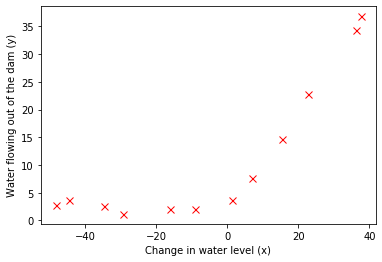

In [2]:
data = loadmat('ex5/ex5data1.mat')
X = data['X']
y = data['y']
Xval = data['Xval']
yval = data['yval']
Xtest = data['Xtest']
ytest = data['ytest']

print('X:', X.shape, ' Xval:', Xval.shape, 'Xtest:', Xtest.shape)
print('y:', y.shape, ' yval:', yval.shape, 'ytest:', ytest.shape)

plt.plot(X,y,'rx',ms=7)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show()

In [3]:
def linearRegCostFunction(X, y, theta, lamb=0.):
    m = X.shape[0]
    J = 0
    theta = theta.reshape(theta.shape[0],1) # 保证 (n+1)x1 维度

    grad = np.zeros((theta.shape[0], theta.shape[1]))
    X = np.c_[np.ones((m,1)), X]


    # =========== code here ============
    h = np.dot(X, theta)
    J = 1 / (2*m) * sum(np.square(h - y)) + lamb / (2*m) * sum(np.square(theta[1:]))

    grad = 1 / m * np.dot(X.T, h - y)
    grad[1:] += lamb / m * theta[1:]
    # ==================================


    return J, grad

## Part 2: Regularized Linear Regression Cost

In [4]:
theta = np.array([[1], [1]])
J, _ = linearRegCostFunction(X, y, theta, 1)
print('J = {}'.format(J))

J = [303.99319222]


## Part 3: Regularized Linear Regression Gradient

In [5]:
theta = np.array([[1],[1]])
J, grad = linearRegCostFunction(X, y, theta, 1)
print('Gradient at theta = [1 ; 1]:  [{}; {}]'.format(grad.ravel()[0], grad.ravel()[1]))

Gradient at theta = [1 ; 1]:  [-15.303015674201186; 598.2507441727035]


## Part 4: Train Linear Regression

In [6]:
def trainLinearReg(linearRegCostFunction, X, y, lamb=0., maxit=200):
    initial_theta = np.zeros((X.shape[1] + 1, 1))
    costFunc = lambda t: linearRegCostFunction(X, y, t, lamb)
    options = {'maxiter': maxit}
    res = minimize(costFunc, initial_theta, jac=True, method='TNC', options=options)

    return res.x

theta: (2,) 	 [13.08790351  0.36777923]


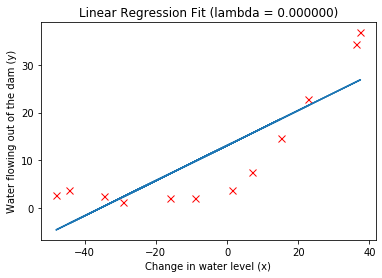

In [7]:
lamb = 0
theta = trainLinearReg(linearRegCostFunction, X, y, lamb)
print('theta:',theta.shape,'\t',theta)

plt.plot(X,y,'rx',ms=7)
plt.plot(X, np.dot(np.c_[np.ones((X.shape[0],1)), X], theta))
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Linear Regression Fit (lambda = %f)' % lamb)
plt.show()

## Part 5: Learning Curve for Linear Regression

In [8]:
def learningCurve(X, y, Xval, yval, lamb=0.):
    m = X.shape[0]
    error_train = np.zeros(m)
    error_val = np.zeros(m)
    

    # =========== code here ============
    for i in np.arange(m):
        theta = trainLinearReg(linearRegCostFunction, X[:i+1,:], y[:i+1,:], lamb)
        Jt,_ = linearRegCostFunction(X[:i+1,:], y[:i+1,:], theta, 0)
        Jv,_ = linearRegCostFunction(Xval, yval, theta, 0)
        error_train[i] = Jt
        error_val[i] = Jv
    # ==================================


    return error_train, error_val

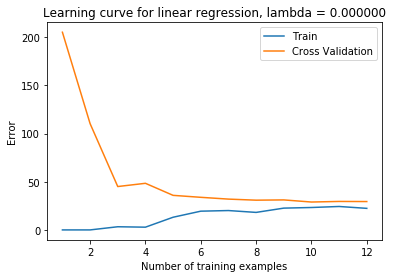

In [9]:
lamb = 0.
et, ev = learningCurve(X, y, Xval, yval, lamb)
plt.plot(np.arange(1,X.shape[0]+1), et)
plt.plot(np.arange(1,X.shape[0]+1), ev)
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.title('Learning curve for linear regression, lambda = %f' % lamb)
plt.show()

## Part 6: Feature Mapping for Polynomial Regression

In [10]:
def polyFeatures(X, p):
    X_poly = np.zeros((X.shape[0], p))

    # =========== code here ============
    for i in np.arange(1,p+1):
        X_poly[:,i-1] = (X ** i).ravel();
    # ==================================

    return X_poly


def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [11]:
p = 8
X_poly = polyFeatures(X, p)
X_poly, mu, sigma = featureNormalize(X_poly)

X_poly_test = polyFeatures(Xtest, p)
X_poly_test = (X_poly_test - mu) / sigma

X_poly_val = polyFeatures(Xval, p)
X_poly_val = (X_poly_val - mu) / sigma

## Part 7: Learning Curve for Polynomial Regression

In [12]:
def polyFit(polyFeautures, min_x, max_x, mu, sigma, theta, p):
    x = np.arange(min_x - 15, max_x + 15, 0.05).reshape(-1,1)
    X_poly = polyFeatures(x, p)
    X_poly = (X_poly - mu) / sigma
    X_poly = np.c_[np.ones((x.shape[0], 1)), X_poly]
    y = np.dot(X_poly, theta)
    plt.plot(x, y, lw=2)

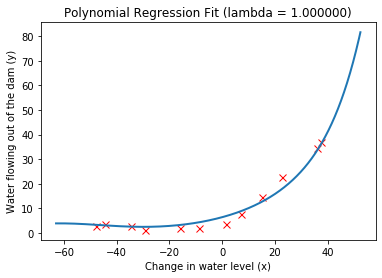

In [13]:
lamb = 1
theta = trainLinearReg(linearRegCostFunction, X_poly, y, lamb, maxit=100)

plt.plot(X, y, 'rx', ms=7)
polyFit(polyFeatures, X.min(), X.max(), mu, sigma, theta, p)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Polynomial Regression Fit (lambda = %f)' % lamb)
plt.show()

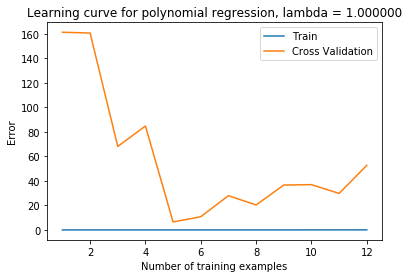

In [14]:
et, ev = learningCurve(X_poly, y, X_poly_val, yval, 0.)
plt.plot(np.arange(1,X.shape[0]+1), et)
plt.plot(np.arange(1,X.shape[0]+1), ev)
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.title('Learning curve for polynomial regression, lambda = %f' % lamb)
plt.show()

## Part 8: Validation for Selecting Lambda

In [15]:
def validationCurve(X, y, Xval, yval):
    lambda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
    error_train = np.zeros(len(lambda_vec))
    error_val = np.zeros(len(lambda_vec))

    # =========== code here ============
    for idx, lamb in enumerate(lambda_vec):
        theta = trainLinearReg(linearRegCostFunction, X, y, lamb)
        Jt,_ = linearRegCostFunction(X, y, theta, 0.)
        Jv,_ = linearRegCostFunction(Xval, yval, theta, 0.)
        error_train[idx] = Jt
        error_val[idx] = Jv
    # ==================================

    return lambda_vec, error_train, error_val

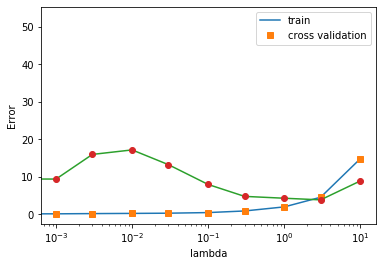

In [16]:
lambda_vec, et, ev = validationCurve(X_poly, y, X_poly_val, yval)
plt.semilogx(lambda_vec, et)
plt.semilogx(lambda_vec, et, 's')
plt.semilogx(lambda_vec, ev)
plt.semilogx(lambda_vec, ev, 'o')
plt.legend(['train', 'cross validation'])
plt.xlabel('lambda')
plt.ylabel('Error')
plt.show()